In [1]:
!pip install numpy
!pip install os
!pip install trimesh
!pip install scikit-learn
!pip install matplotlib
!pip install polymesh
!python3 -m pip install lapy
!pip install robust-laplacian
!pip install libigl
!pip install pandas

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


## Importing libraries

In [2]:
import numpy as np
import os
import trimesh
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import igl
import scipy.sparse.linalg as sla
import robust_laplacian

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import trimesh
import matplotlib.pyplot as plt
import scipy.io as sio


In [3]:
def rescaling(v):
    new_v = v.copy()
    # Maximum values
    max_x = np.max(v[:,0])
    max_y = np.max(v[:,1])
    max_z = np.max(v[:,2])
    # Min values
    min_x = np.min(v[:,0])
    min_y = np.min(v[:,1])
    min_z = np.min(v[:,2])
    # Widths
    size = np.array([max_x - min_x, max_y - min_y, max_z - min_z])
    # Center
    center = 1/np.array([max_x - min_x, max_y - min_y, max_z - min_z])
    new_v = v - center
    new_v = new_v*size
    return new_v

## Extracting Features

In [4]:
def extract_features(mesh_path):
    mesh = trimesh.load(mesh_path)
    v = rescaling(np.array(mesh.vertices))
    L, M = robust_laplacian.mesh_laplacian(v, np.array(mesh.faces), 1e-6)
    
    n_eig = 30
    e_values, e_vectors = sla.eigsh(L, n_eig, M, sigma=1e-8)
    print("Eigen Values:",e_values)
    # features = np.concatenate((e_values.real, np.array(e_vectors.real).real.flatten()))
    return e_values

## Loading data

In [5]:
#loading data, preprocessing using laplace-beltrami and performing train-test splits
def load_data(data_dir):
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    for category in os.listdir(data_dir):
        category_dir = os.path.join(data_dir, category)
        train_dir = os.path.join(category_dir, 'train')
        test_dir = os.path.join(category_dir, 'test')

        for filename in os.listdir(train_dir):
            if filename.endswith('.obj'):
                mesh_path = os.path.join(train_dir, filename)
                feature = extract_features(mesh_path)
                X_train.append(feature)
                y_train.append(category)

        for filename in os.listdir(test_dir):
            if filename.endswith('.obj'):
                mesh_path = os.path.join(test_dir, filename)
                feature = extract_features(mesh_path)
                X_test.append(feature)
                y_test.append(category)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

## Train test split

In [6]:
data_dir = data_dir = 'C:/Users/Administrator/Desktop/surface_characterization/ModelNet10_Adaptive_Isotropic_Remeshed'

X_train, y_train, X_test, y_test = load_data(data_dir)

Eigen Values: [9.49603343e-21 1.07864352e-20 2.44994354e-20 4.02142127e-20
 5.53532722e-20 8.70723400e-20 2.02857773e-19 2.87365854e-19
 6.62665969e-19 7.26467251e-07 8.57389080e-07 9.09417868e-07
 1.95077739e-06 2.38950041e-06 2.49980488e-06 2.77545474e-06
 2.90977322e-06 3.40644117e-06 4.44803943e-06 4.86001583e-06
 4.86139795e-06 5.14515536e-06 5.36038072e-06 5.61417107e-06
 5.64030200e-06 6.16313462e-06 6.81643606e-06 7.03652848e-06
 7.97422685e-06 8.40029055e-06]
Eigen Values: [1.42539763e-20 8.86056367e-07 1.99809736e-06 2.37327480e-06
 2.75469324e-06 3.71407921e-06 3.95236414e-06 4.38288663e-06
 4.74727192e-06 5.30317552e-06 5.68183874e-06 6.47540860e-06
 7.03069616e-06 7.42329168e-06 7.87132515e-06 8.07999224e-06
 8.27633915e-06 8.90336119e-06 9.33891855e-06 9.78320731e-06
 1.09899851e-05 1.12097358e-05 1.22234822e-05 1.34241791e-05
 1.39246941e-05 1.46108450e-05 1.56811186e-05 1.70298356e-05
 1.81748414e-05 1.95922136e-05]
Eigen Values: [-3.21561831e-18 -4.53989807e-20 -2.4319

Eigen Values: [-3.09365549e-22  2.73719603e-08  8.95414253e-08  1.16139267e-07
  1.28296443e-07  1.78740291e-07  2.00461783e-07  2.12672797e-07
  2.98020999e-07  3.03827756e-07  3.45693077e-07  4.01582543e-07
  4.03905400e-07  4.41726569e-07  4.42610431e-07  4.95349690e-07
  5.34495282e-07  5.49137129e-07  5.67919336e-07  6.16832961e-07
  6.76662204e-07  6.81019896e-07  7.35220910e-07  7.64287482e-07
  8.20444184e-07  8.25703195e-07  8.56279535e-07  9.04315006e-07
  9.57337901e-07  9.73653280e-07]
Eigen Values: [-6.13870585e-19 -3.28554485e-19  1.06391970e-20  6.37070653e-07
  1.06649988e-06  1.81727417e-06  2.47778440e-06  3.37570238e-06
  3.87593517e-06  4.62353042e-06  5.49057830e-06  5.80293498e-06
  6.30866243e-06  6.37392981e-06  8.55228423e-06  8.83886064e-06
  9.64879683e-06  9.96567260e-06  1.08431648e-05  1.17419956e-05
  1.20181178e-05  1.23974370e-05  1.27070813e-05  1.33378502e-05
  1.48795008e-05  1.54109009e-05  1.63008957e-05  1.68339457e-05
  1.72214202e-05  1.78104194

Eigen Values: [1.56998880e-20 3.55886253e-07 1.35018492e-06 2.84696515e-06
 2.87525867e-06 3.80402572e-06 4.97018996e-06 5.28015923e-06
 7.01519869e-06 7.63874084e-06 9.02364015e-06 1.03850226e-05
 1.07798697e-05 1.16694861e-05 1.18855789e-05 1.35261768e-05
 1.48488020e-05 1.49551323e-05 1.66308867e-05 1.87289010e-05
 1.87781852e-05 2.03642101e-05 2.25099740e-05 2.27563801e-05
 2.32417430e-05 2.46789015e-05 2.47077211e-05 2.57430943e-05
 2.64181306e-05 2.85619205e-05]
Eigen Values: [-2.74494096e-18 -1.94476779e-19 -3.87616835e-20  3.42287337e-21
  5.53350743e-20  1.82929338e-19  6.16148640e-19  9.08008250e-07
  2.05341005e-06  3.23169188e-06  4.42543840e-06  6.37533751e-06
  6.84588922e-06  7.86457748e-06  9.87468799e-06  1.11124077e-05
  1.13300515e-05  1.27459953e-05  1.34894545e-05  1.47694510e-05
  1.68068328e-05  1.78661336e-05  1.91395984e-05  2.10202961e-05
  2.29668166e-05  2.41439197e-05  2.44664000e-05  2.64619168e-05
  2.85808537e-05  2.96895565e-05]
Eigen Values: [8.1244987

Eigen Values: [1.15722568e-20 5.13680556e-07 1.99463861e-06 3.16002605e-06
 4.27654131e-06 4.55285429e-06 6.88509161e-06 7.18805085e-06
 1.01686865e-05 1.06416085e-05 1.13426371e-05 1.31512184e-05
 1.43575956e-05 1.46758665e-05 1.66713444e-05 1.92217111e-05
 1.93547511e-05 2.20090173e-05 2.46236699e-05 2.48729650e-05
 2.51464061e-05 2.68363416e-05 2.88784204e-05 2.97471560e-05
 3.09459903e-05 3.17314553e-05 3.41623167e-05 3.67818480e-05
 3.78729302e-05 3.90235023e-05]
Eigen Values: [-1.67148386e-19 -7.85920844e-20 -4.96473804e-21  1.05381156e-19
  2.39403667e-08  1.35762266e-07  4.07553576e-07  5.04227533e-07
  8.63136641e-07  1.44753519e-06  1.57787937e-06  1.62124855e-06
  1.72178755e-06  2.02200103e-06  2.56200838e-06  2.63596630e-06
  3.45715350e-06  3.50861522e-06  3.68881262e-06  4.18354166e-06
  4.73332790e-06  5.09931211e-06  5.17946002e-06  5.21935508e-06
  5.29824460e-06  5.43967053e-06  5.49598879e-06  5.72216869e-06
  5.90653437e-06  5.93789103e-06]
Eigen Values: [-4.630557

Eigen Values: [-4.88852161e-18 -3.46462945e-19  1.33705474e-20  6.64834837e-19
  1.41538213e-18  3.49418731e-08  3.69041626e-07  4.24670886e-07
  5.40763046e-07  5.94882457e-07  6.55745680e-07  7.11126864e-07
  8.35611174e-07  8.79451532e-07  8.94354042e-07  9.07303256e-07
  9.24779996e-07  9.43390580e-07  9.61567634e-07  1.34725378e-06
  1.56897723e-06  1.72639036e-06  1.78578182e-06  2.48116553e-06
  2.77310106e-06  2.88957782e-06  3.03853019e-06  3.32815710e-06
  3.35732544e-06  3.53506629e-06]
Eigen Values: [1.65436123e-23 1.80773501e-10 7.21696051e-10 1.61750073e-09
 2.42540352e-09 2.85925704e-09 2.92963561e-09 3.74791946e-09
 4.43021790e-09 4.85650052e-09 6.24319232e-09 6.31417434e-09
 7.94290287e-09 8.41622120e-09 9.21412432e-09 9.87317591e-09
 9.98021780e-09 1.04857798e-08 1.12178244e-08 1.22165985e-08
 1.23941400e-08 1.34891290e-08 1.42503619e-08 1.51844737e-08
 1.61525518e-08 1.66563707e-08 1.82759185e-08 1.89951686e-08
 1.94248457e-08 2.04109220e-08]
Eigen Values: [1.7205356

Eigen Values: [-1.08526096e-21  6.10459292e-22  2.24496818e-21  2.68833699e-21
  3.22435003e-21  3.30872245e-21  4.24509090e-21  5.62979125e-21
  5.72408984e-21  7.02276340e-21  7.56870260e-21  8.12456798e-21
  8.41573555e-21  8.93189625e-21  9.05762771e-21  9.48279854e-21
  1.11139987e-20  1.13224482e-20  1.13621529e-20  1.33606213e-20
  1.64873640e-20  2.51793778e-20  2.73879501e-20  2.98049718e-20
  3.07413403e-20  3.08240583e-20  4.01596187e-20  4.19546007e-20
  4.30630227e-20  8.86838691e-09]
Eigen Values: [9.94423619e-09 9.94431897e-09 9.94600959e-09 9.95279999e-09
 9.95315280e-09 9.95334392e-09 9.95876051e-09 9.96109617e-09
 9.96512646e-09 9.97034831e-09 9.97458811e-09 9.97496913e-09
 9.97767750e-09 9.99137980e-09 1.00055070e-08 1.00151926e-08
 1.00212122e-08 1.00238902e-08 1.00284983e-08 1.00305447e-08
 1.00311678e-08 1.00389137e-08 1.00391232e-08 1.00396133e-08
 1.00415326e-08 1.00466061e-08 1.00497701e-08 1.00543563e-08
 1.00560739e-08 1.00596834e-08]
Eigen Values: [-4.633018

Eigen Values: [-7.26926322e-21 -5.69265698e-21  2.60561893e-21  3.66275575e-21
  4.09785275e-21  1.50828113e-20  1.92964693e-20  2.06910958e-20
  2.21535512e-20  2.26232891e-07  2.70913303e-07  9.04323516e-07
  1.07674300e-06  2.01218985e-06  2.03268113e-06  2.22641388e-06
  2.37192399e-06  2.41198716e-06  2.48275305e-06  2.66763002e-06
  2.75306924e-06  2.94006555e-06  3.02018334e-06  3.21587853e-06
  3.33253600e-06  3.44511959e-06  3.60874356e-06  3.85587869e-06
  4.09013249e-06  4.25512319e-06]
Eigen Values: [-1.30014594e-19 -5.83542835e-20 -1.52945695e-20 -2.35911911e-21
 -1.34995876e-21  1.28378431e-21  4.32946333e-21  5.13844597e-21
  5.47924438e-21  6.52810939e-21  8.60433273e-21  1.07616198e-20
  1.43168420e-19  1.81874332e-08  2.71752880e-08  1.04972756e-07
  1.18811000e-07  1.95754415e-07  2.09563482e-07  2.40290773e-07
  3.33960836e-07  3.76687156e-07  3.82357922e-07  3.92754175e-07
  4.28648738e-07  5.69845046e-07  5.75008010e-07  6.58732011e-07
  6.59994639e-07  7.82538118

Eigen Values: [-9.42489590e-21  3.92083610e-22  7.21797803e-21  2.43571603e-20
  1.96166599e-07  2.78856282e-07  7.87850158e-07  8.57206335e-07
  9.02950921e-07  1.05149895e-06  1.05283914e-06  1.11473350e-06
  1.17138634e-06  1.19226925e-06  1.63321317e-06  1.64677070e-06
  1.78122611e-06  1.99965123e-06  2.03502274e-06  2.50489706e-06
  2.60220516e-06  2.65190075e-06  3.17588439e-06  3.37887306e-06
  3.42619112e-06  3.43629064e-06  3.60558371e-06  3.61585696e-06
  3.61615690e-06  3.85424431e-06]
Eigen Values: [-6.05496208e-22 -4.30133919e-23  2.12089109e-21  3.28921420e-08
  8.21718087e-08  1.18936015e-07  1.20716810e-07  1.88781028e-07
  1.97832970e-07  2.30855010e-07  2.46318124e-07  2.51920784e-07
  2.78702758e-07  3.78944115e-07  4.09481798e-07  4.82068302e-07
  5.53996165e-07  5.69183308e-07  5.98356794e-07  6.17330634e-07
  7.04257258e-07  7.49248118e-07  7.70977021e-07  8.10063412e-07
  8.62629102e-07  8.78156029e-07  8.80033286e-07  9.08268735e-07
  1.00780500e-06  1.03381833

Eigen Values: [-1.39098692e-20 -1.73542493e-21  2.50304853e-20  1.50248085e-07
  2.14329931e-07  2.21099867e-07  5.33983569e-07  8.35767661e-07
  8.62939881e-07  8.84072318e-07  1.10423983e-06  1.36778353e-06
  1.82727481e-06  1.98779569e-06  2.01565707e-06  2.23813900e-06
  2.77712899e-06  2.84381467e-06  3.08190063e-06  3.37670008e-06
  3.42706586e-06  3.53147753e-06  3.64209305e-06  3.75395542e-06
  3.92143345e-06  3.93767629e-06  4.01896364e-06  4.17032655e-06
  4.38414000e-06  4.59079411e-06]
Eigen Values: [-2.26879098e-20 -2.13346424e-20 -2.08118642e-20 -1.67073940e-20
 -1.47535934e-20 -5.09377821e-21 -4.55611081e-21 -4.34104385e-21
 -3.51220888e-21  1.95545497e-21  2.75616580e-21  6.81265952e-21
  7.21632366e-21  7.90288357e-21  8.28338665e-21  8.65561793e-21
  1.17310754e-20  1.26641352e-20  1.59133006e-20  1.05984104e-07
  1.46442657e-07  1.48733343e-07  1.59583818e-07  2.05604806e-07
  2.31863273e-07  2.36488608e-07  2.55251888e-07  2.83154301e-07
  5.19208437e-07  5.34206423

Eigen Values: [-4.38468590e-19 -1.41598432e-19 -8.94000262e-20  4.72551740e-20
  5.28551868e-20  5.59852382e-20  8.09842907e-20  1.16141121e-19
  3.31119568e-06  6.45890293e-06  6.80494475e-06  1.17580249e-05
  1.32364299e-05  2.14564615e-05  2.21866577e-05  2.58226373e-05
  2.72048635e-05  2.97515973e-05  3.23222178e-05  3.56038751e-05
  3.56651300e-05  3.68563663e-05  4.02498696e-05  4.54966283e-05
  4.55629580e-05  4.69964866e-05  5.19859778e-05  5.25868292e-05
  5.28204954e-05  5.80664717e-05]
Eigen Values: [9.63192632e-09 9.65087720e-09 9.67585252e-09 9.73928031e-09
 9.74419909e-09 9.75988957e-09 9.82741451e-09 9.82923460e-09
 9.88444226e-09 9.89916456e-09 9.91796627e-09 9.95406465e-09
 9.98237386e-09 9.99598698e-09 1.00057435e-08 1.00683066e-08
 1.00716259e-08 1.00837495e-08 1.00845853e-08 1.00915495e-08
 1.00999054e-08 1.01208312e-08 1.01253912e-08 1.01647977e-08
 1.01900155e-08 1.02513689e-08 1.03063189e-08 1.03167470e-08
 1.03242184e-08 1.03513866e-08]
Eigen Values: [-1.445406

Eigen Values: [-1.82836032e-18 -1.13144080e-18 -6.76531171e-19 -6.26031794e-19
 -4.52370188e-19 -2.82956981e-19 -1.40983009e-19 -9.58239109e-20
 -6.69321464e-20 -5.17517278e-20 -4.96374542e-20 -3.71718424e-20
 -3.63777490e-20 -1.71309105e-20 -9.58371458e-21 -1.34665004e-21
  3.64339973e-20  4.27917074e-20  8.82734062e-20  9.33142449e-20
  1.36192145e-18  5.97099116e-07  1.96215651e-06  3.31321275e-06
  3.31422718e-06  5.61299299e-06  8.09244829e-06  8.77499551e-06
  9.92184789e-06  9.93207339e-06]
Eigen Values: [-4.06948542e-18 -1.92445720e-18 -1.77336108e-18 -1.73665412e-18
 -1.25998963e-18 -2.68598780e-19 -2.52918744e-20  1.88547549e-20
  5.96115980e-20  6.41594370e-20  2.36449578e-19  3.05118804e-19
  5.09235546e-19  2.24071978e-18  2.95891439e-18  3.77236843e-06
  4.09665018e-06  1.25693335e-05  1.25709665e-05  1.57451770e-05
  1.65653687e-05  1.68432606e-05  1.77521180e-05  2.01612670e-05
  2.09083944e-05  2.21001062e-05  3.13148736e-05  3.13212588e-05
  3.13570758e-05  3.13581286

Eigen Values: [-2.28300856e-18 -2.24606006e-19 -3.77095098e-20 -9.81532515e-21
  2.14355584e-20  2.83623688e-20  7.90436343e-07  1.75773682e-06
  1.95649433e-06  2.56841289e-06  5.06912869e-06  6.20187825e-06
  6.86653643e-06  7.74618317e-06  7.86762029e-06  1.13464374e-05
  1.31256543e-05  1.32203876e-05  1.83027996e-05  1.86812513e-05
  2.03386335e-05  2.24031916e-05  2.47905002e-05  2.50717340e-05
  2.58899135e-05  2.64939729e-05  2.68029892e-05  2.72446380e-05
  2.77786863e-05  3.11540869e-05]
Eigen Values: [-2.68739235e-18 -2.33573140e-18 -1.22575759e-18 -1.07756818e-18
 -9.32255711e-19 -8.21094218e-19 -7.21265098e-19 -4.32147276e-19
 -2.48906918e-19 -1.99482877e-19 -1.75239867e-19 -1.41605049e-19
 -1.23883532e-19  8.73337291e-21  1.88100871e-20  4.42723607e-20
  5.26136500e-20  5.70092878e-20  6.13569491e-20  6.70611866e-20
  2.30884307e-19  2.48407301e-19  2.87592501e-19  3.64432617e-19
  4.76988737e-19  6.08947206e-19  2.73618277e-18  6.34606449e-06
  9.60617460e-06  1.59070223

Eigen Values: [-9.83999167e-19 -2.87230196e-20  5.45327091e-20  7.74621556e-20
  1.22697648e-06  3.45587293e-06  3.47309583e-06  3.75735445e-06
  4.01181647e-06  4.31320487e-06  6.85936794e-06  7.34277705e-06
  1.30425473e-05  1.49494584e-05  1.51836290e-05  1.54132537e-05
  1.76982506e-05  1.84077519e-05  1.88073699e-05  2.02124804e-05
  2.07190238e-05  2.32778626e-05  2.45487984e-05  2.52724107e-05
  2.77309194e-05  3.45335690e-05  3.51493352e-05  3.62502176e-05
  3.69976664e-05  3.82548911e-05]
Eigen Values: [-1.73669713e-18 -6.79738977e-19 -6.41599333e-19 -3.93453421e-19
 -2.66070916e-19 -2.27590474e-19 -2.18974560e-19 -9.98919851e-20
 -8.31746650e-20 -8.49018181e-21  5.41488973e-20  1.59496966e-19
  2.11066714e-19  9.96115709e-19  1.06483126e-18  1.74270246e-18
  6.28200496e-18  6.64334468e-07  7.52682468e-07  1.47030092e-06
  2.35875175e-06  2.80423416e-06  3.60584792e-06  3.79002257e-06
  7.30463147e-06  8.18078911e-06  9.55661544e-06  1.06512096e-05
  1.08148523e-05  1.74886294

Eigen Values: [9.81998459e-09 9.83870647e-09 9.85162885e-09 9.85715660e-09
 9.88626852e-09 9.90002337e-09 9.90482878e-09 9.91527279e-09
 9.92319550e-09 9.94964062e-09 9.95033260e-09 9.96977130e-09
 9.99833543e-09 1.00085110e-08 1.00186048e-08 1.00389147e-08
 1.00539237e-08 1.00694837e-08 1.00726516e-08 1.00989691e-08
 1.00996693e-08 1.01122720e-08 1.01199201e-08 1.01245157e-08
 1.01279282e-08 1.01412786e-08 1.01650945e-08 1.01687954e-08
 1.01771817e-08 1.01880951e-08]
Eigen Values: [-2.98473566e-18 -2.76920051e-18 -2.76021899e-19 -1.58592030e-19
 -6.21808210e-20 -3.54182195e-20 -2.67675646e-20 -2.01550828e-20
  2.36656373e-20  5.25100870e-19  1.15420481e-18  1.79976033e-06
  5.01003848e-06  6.38649550e-06  6.86276057e-06  1.49780113e-05
  1.53349638e-05  1.58849390e-05  1.76298567e-05  2.05035096e-05
  2.57800219e-05  3.30591239e-05  3.31040807e-05  3.36452389e-05
  3.44226064e-05  3.44695532e-05  3.53237706e-05  4.15371761e-05
  4.16036992e-05  4.45041574e-05]
Eigen Values: [5.1511200

Eigen Values: [3.78013268e-19 8.41874681e-06 1.17253019e-05 1.19756677e-05
 1.46532468e-05 3.14009274e-05 8.19821886e-05 8.36969624e-05
 9.89413882e-05 1.01784952e-04 1.12634167e-04 1.24548409e-04
 1.31338769e-04 1.71836947e-04 1.75690480e-04 2.11208635e-04
 2.18876346e-04 2.45507309e-04 2.57025565e-04 2.88111178e-04
 2.96666730e-04 3.13351150e-04 3.27463677e-04 3.35374839e-04
 3.66233830e-04 3.79693298e-04 4.02105415e-04 4.41402229e-04
 4.63663814e-04 4.94833686e-04]
Eigen Values: [-2.26965125e-18 -1.29010232e-18 -1.03246864e-18 -2.40747609e-19
 -1.22394607e-19 -2.70405342e-20 -1.13604985e-20  1.61209230e-19
  3.36182745e-19  1.16233765e-18  5.49258515e-18  4.30736288e-08
  1.88165373e-07  1.99345453e-07  3.32880891e-07  3.89255955e-07
  4.42366245e-07  6.92706907e-07  7.92176379e-07  9.84288962e-07
  1.00855835e-06  1.19606154e-06  1.35542244e-06  1.49305647e-06
  1.52666446e-06  1.77417815e-06  1.90020007e-06  1.98981401e-06
  2.03461703e-06  2.14122705e-06]
Eigen Values: [-3.178027

Eigen Values: [6.94433675e-18 2.31124438e-07 5.31874960e-07 1.10063914e-06
 1.88786230e-06 1.93500471e-06 2.13160782e-06 2.72469948e-06
 4.38063781e-06 4.78682013e-06 4.83342514e-06 5.26069141e-06
 5.38020874e-06 7.16800776e-06 7.85331828e-06 8.24514692e-06
 9.35690647e-06 9.89517056e-06 1.09001266e-05 1.22924053e-05
 1.38328911e-05 1.40523541e-05 1.45155412e-05 1.52703327e-05
 1.61502240e-05 1.63358087e-05 1.64378072e-05 1.67813686e-05
 1.77906999e-05 1.82258997e-05]
Eigen Values: [-5.80763508e-20 -3.62685611e-20 -1.69935985e-20  1.05959587e-06
  3.47788318e-06  4.69622816e-06  6.13799864e-06  6.73514859e-06
  8.04103448e-06  8.57382481e-06  1.12817319e-05  1.27987591e-05
  1.27990577e-05  1.29602205e-05  1.43105740e-05  1.48356933e-05
  1.57562165e-05  1.64595149e-05  1.89183925e-05  2.00124271e-05
  2.09245828e-05  2.09247743e-05  2.23074039e-05  2.26065842e-05
  2.45349898e-05  2.63311246e-05  2.65051841e-05  2.72169821e-05
  3.04218301e-05  3.12838351e-05]
Eigen Values: [-1.405379

Eigen Values: [-5.77051121e-19 -2.26622672e-19 -1.36109261e-19 -2.40626840e-20
  3.32692042e-21  1.49173752e-20  3.01126830e-20  4.19595638e-20
  5.16623923e-20  6.15048811e-07  6.55816159e-07  7.99035850e-07
  1.03073394e-06  1.43236789e-06  2.20788984e-06  2.65427623e-06
  2.71521796e-06  3.19553435e-06  3.62822475e-06  3.69485756e-06
  3.98866607e-06  4.26738153e-06  4.75266779e-06  5.02789998e-06
  5.82647373e-06  7.18775142e-06  7.72006061e-06  8.48836693e-06
  8.65256010e-06  9.92986129e-06]
Eigen Values: [-2.93318245e-21  1.05949770e-07  4.02929965e-07  6.12195373e-07
  6.91028461e-07  1.17659757e-06  1.49417914e-06  1.65760133e-06
  1.78153573e-06  1.95719314e-06  2.08659462e-06  2.21240438e-06
  2.36553155e-06  2.46681264e-06  3.11978981e-06  3.58088602e-06
  3.77412645e-06  4.24724454e-06  4.46647276e-06  4.53233601e-06
  4.59748530e-06  4.82717896e-06  4.89949320e-06  4.93033931e-06
  5.07782422e-06  5.09913124e-06  5.19529901e-06  5.47235810e-06
  5.62439503e-06  5.86643103

Eigen Values: [-2.31130807e-20  5.92945595e-07  6.91242895e-07  1.07261261e-06
  2.24087243e-06  2.71550582e-06  3.36461361e-06  3.55829324e-06
  4.38329892e-06  4.78376373e-06  5.69653212e-06  6.10913042e-06
  7.19870325e-06  7.41314211e-06  8.41871838e-06  9.58479355e-06
  1.00238635e-05  1.06344429e-05  1.28706276e-05  1.31789841e-05
  1.36893033e-05  1.47577296e-05  1.53372101e-05  1.56647375e-05
  1.63133130e-05  1.74817904e-05  1.75703083e-05  1.81036103e-05
  1.91103356e-05  2.00465307e-05]
Eigen Values: [-1.65829695e-18 -5.30108622e-19 -2.24055104e-19 -8.62931359e-20
 -6.24058141e-20 -4.86382200e-20 -2.70488060e-20  5.29395592e-21
  2.65309910e-20  1.60560720e-19  5.91378386e-18  1.73204894e-07
  9.18041801e-07  1.11074022e-06  2.17350804e-06  2.48041298e-06
  3.67024646e-06  4.43373328e-06  4.56215836e-06  6.23194495e-06
  6.23203304e-06  6.26540011e-06  6.27898135e-06  7.04096393e-06
  8.25062886e-06  9.45305170e-06  9.46831118e-06  1.15582113e-05
  1.23488459e-05  1.23677150

Eigen Values: [-1.74022257e-20 -1.50265630e-20 -7.36356181e-21  1.25731453e-20
  1.79216952e-20  1.14198901e-19  4.12825931e-07  8.21125251e-07
  9.00724442e-07  1.02607151e-06  1.38563995e-06  1.72035962e-06
  1.79307324e-06  1.80489445e-06  1.82797108e-06  2.12541905e-06
  2.47361818e-06  2.52792732e-06  2.56623624e-06  2.62654875e-06
  2.66271416e-06  2.72125449e-06  2.95559770e-06  3.08770342e-06
  3.33055010e-06  3.48310432e-06  3.49135136e-06  3.52712930e-06
  3.58466346e-06  3.77907527e-06]
Eigen Values: [9.78830349e-09 9.79477178e-09 9.80495745e-09 9.81071125e-09
 9.82476655e-09 9.84980204e-09 9.85342645e-09 9.86747168e-09
 9.88060110e-09 9.89175054e-09 9.91747454e-09 9.92483527e-09
 9.93664526e-09 9.95209509e-09 9.96780851e-09 9.98124879e-09
 9.99989975e-09 1.00079850e-08 1.00179851e-08 1.00312481e-08
 1.00599207e-08 1.00787906e-08 1.00831204e-08 1.01058839e-08
 1.01293412e-08 1.01562716e-08 1.01907575e-08 1.01935386e-08
 1.02168310e-08 1.02228744e-08]
Eigen Values: [-1.838706

Eigen Values: [-6.11254047e-18 -1.62207637e-18 -1.05654125e-19 -9.19924103e-20
 -8.27130982e-20 -5.18195567e-20 -4.01381120e-20 -3.74051073e-20
 -2.53117267e-21  1.29999705e-20  1.60291059e-20  3.24138995e-20
  5.70539556e-20  1.29344578e-19  1.56345408e-19  2.05501443e-19
  7.76128680e-19  1.07814556e-18  1.25102465e-18  1.32588780e-18
  2.54472355e-18  4.49768705e-18  4.75517845e-18  5.24097335e-18
  6.06334473e-18  1.15509822e-07  2.61331686e-07  2.70857524e-07
  3.73941140e-07  3.82257109e-07]
Eigen Values: [-1.39562972e-17 -1.10937526e-17 -1.01769950e-17 -8.41940162e-18
 -3.17909001e-18 -1.67060705e-19 -1.63123326e-19 -1.19218233e-19
 -3.97890418e-20 -3.90760121e-20 -3.05577062e-20  6.16580429e-20
  2.97013592e-18  5.07552895e-18  1.19664629e-17  2.25969365e-17
  2.23977922e-06  2.54042049e-06  6.17305157e-06  6.67940483e-06
  9.19557599e-06  1.03820747e-05  1.16405283e-05  1.25281010e-05
  1.51423015e-05  1.51424483e-05  1.51424598e-05  1.51424748e-05
  1.51425164e-05  1.56935362

Eigen Values: [3.65498025e-20 3.34032544e-06 4.81778851e-06 8.28805887e-06
 1.06849108e-05 1.14556899e-05 1.32502484e-05 1.46707936e-05
 1.57162508e-05 2.30610225e-05 2.38732557e-05 2.64990087e-05
 2.78556441e-05 2.86215174e-05 3.15971409e-05 3.40681041e-05
 3.62106964e-05 3.74192891e-05 4.03381328e-05 4.11537522e-05
 4.67848400e-05 4.73145272e-05 4.79523931e-05 5.01767052e-05
 5.41158735e-05 5.64075207e-05 6.13846624e-05 6.34862101e-05
 6.67033114e-05 6.96146280e-05]
Eigen Values: [-1.23488139e-18 -2.27147105e-19 -1.75572394e-19 -1.56767270e-20
  6.79158059e-06  8.39451445e-06  1.17328608e-05  1.77455306e-05
  2.56829324e-05  2.73211373e-05  3.13581693e-05  3.27107119e-05
  4.02990569e-05  4.41065024e-05  4.58215497e-05  5.47846641e-05
  5.76857252e-05  6.66053069e-05  6.76325081e-05  6.81525369e-05
  7.25603084e-05  7.41568963e-05  8.15521242e-05  8.90309408e-05
  9.49459284e-05  9.69247352e-05  1.02546996e-04  1.05777671e-04
  1.11084570e-04  1.15414095e-04]
Eigen Values: [1.5550995

Eigen Values: [-3.55356791e-21  1.03191208e-06  1.10143816e-06  2.58042394e-06
  3.84732494e-06  4.15596571e-06  4.62615229e-06  5.67414334e-06
  6.10554108e-06  7.46157326e-06  7.82618316e-06  1.05962828e-05
  1.10434785e-05  1.14928064e-05  1.24503808e-05  1.33463048e-05
  1.57339119e-05  1.59997064e-05  1.65068587e-05  1.71908697e-05
  1.77383297e-05  1.99810532e-05  2.03233999e-05  2.33730197e-05
  2.37112121e-05  2.55601318e-05  2.63981673e-05  2.78681892e-05
  3.16099254e-05  3.44398317e-05]
Eigen Values: [-2.25654209e-18 -1.65813813e-18 -1.06220413e-18 -5.68704869e-19
  1.07371352e-19  1.40233584e-19  1.62034756e-19  2.97196068e-19
  2.36332334e-06  4.27426979e-06  6.39318801e-06  1.00408364e-05
  1.03122428e-05  1.03201472e-05  1.04807459e-05  1.10625416e-05
  1.12218980e-05  1.12283078e-05  1.12346121e-05  1.26565421e-05
  1.46104908e-05  1.58697857e-05  2.05455358e-05  2.19476997e-05
  2.28709048e-05  2.63134821e-05  2.88275636e-05  2.97550795e-05
  2.97929099e-05  2.98127862

Eigen Values: [8.88738930e-09 8.98296745e-09 8.99820442e-09 9.05514698e-09
 9.17150279e-09 9.29685006e-09 9.35825305e-09 9.41074339e-09
 9.61092011e-09 9.72730512e-09 9.87808501e-09 9.89073905e-09
 1.00774783e-08 1.01073055e-08 1.02788292e-08 1.03081164e-08
 1.04142449e-08 1.04587446e-08 1.05361968e-08 1.05473700e-08
 1.06184987e-08 1.07512414e-08 1.08166601e-08 1.08403046e-08
 1.08842314e-08 1.09329598e-08 1.09652192e-08 1.09888355e-08
 1.10572477e-08 1.11492631e-08]
Eigen Values: [-4.23978040e-19 -3.58778010e-19 -9.65237057e-20  2.55631897e-20
  3.33204894e-20  1.27422210e-19  1.49688258e-19  2.14026366e-19
  2.55754319e-19  3.65660153e-19  4.14788064e-19  5.06007887e-19
  6.90657761e-19  8.04151904e-19  7.95475024e-07  1.18288642e-06
  1.50395064e-06  2.34267025e-06  3.04457257e-06  3.26874183e-06
  4.27979377e-06  4.47913512e-06  5.03700663e-06  5.81825048e-06
  5.90995061e-06  6.41833147e-06  7.00124178e-06  8.80827419e-06
  9.01073292e-06  9.17084287e-06]
Eigen Values: [-1.022469

Eigen Values: [-7.18637973e-20  2.81345044e-07  8.74912044e-07  9.96283775e-07
  1.07019286e-06  1.18157711e-06  1.61459148e-06  2.35721475e-06
  2.84784493e-06  2.89664042e-06  3.17750450e-06  4.02644982e-06
  4.32961009e-06  4.45066003e-06  4.75082283e-06  4.96178288e-06
  6.04746776e-06  6.39525504e-06  7.22997891e-06  7.39881305e-06
  7.53258203e-06  8.38707998e-06  9.23142919e-06  9.70959952e-06
  9.89125026e-06  1.03277566e-05  1.08072806e-05  1.13720986e-05
  1.17319216e-05  1.23452723e-05]
Eigen Values: [-5.53245029e-18 -1.66649431e-18 -2.08168273e-20  1.53333147e-18
  1.63243614e-17  1.30381250e-05  5.87045975e-05  1.13258548e-04
  1.21055447e-04  1.65548916e-04  2.10543957e-04  2.20362166e-04
  2.38124358e-04  2.59342212e-04  2.74780064e-04  3.89635203e-04
  4.28093354e-04  4.93162230e-04  5.42236646e-04  5.55293025e-04
  5.58822659e-04  5.88015039e-04  6.87107230e-04  7.08847525e-04
  7.18906395e-04  7.37992769e-04  7.83179381e-04  8.77821354e-04
  9.32424265e-04  9.44524981

Eigen Values: [-3.58715988e-17 -3.03342351e-18 -4.55371199e-19  1.04840676e-18
  2.12365387e-18  7.93979487e-06  1.36446266e-05  3.06001806e-05
  3.40050896e-05  4.00481087e-05  4.19269378e-05  4.26937520e-05
  4.38731203e-05  5.36188927e-05  6.89002097e-05  7.05177165e-05
  1.22532481e-04  1.31069867e-04  1.41410699e-04  1.51606127e-04
  1.53483891e-04  1.60891037e-04  1.66982676e-04  1.70182819e-04
  1.74140480e-04  1.75592106e-04  1.81978969e-04  1.99226948e-04
  2.05535289e-04  2.08386349e-04]
Eigen Values: [-2.86771913e-16  7.58127575e-19  1.88424795e-17  3.57552261e-17
  7.53245704e-17  1.14925975e-16  1.52474661e-16  3.63275589e-05
  7.24322759e-05  1.28325471e-04  1.42827230e-04  1.94426427e-04
  2.50958764e-04  3.36037899e-04  3.56685720e-04  3.63830257e-04
  3.92890820e-04  4.64108905e-04  5.54904674e-04  5.92149992e-04
  6.42734605e-04  6.64052277e-04  6.86774955e-04  6.96749262e-04
  8.24583832e-04  8.91129942e-04  9.21674573e-04  1.00583250e-03
  1.03842724e-03  1.09181659

Eigen Values: [-8.07725325e-20 -6.43347993e-20 -4.89029178e-20  2.46499823e-22
  1.04400119e-19  1.19168602e-19  2.92621139e-09  5.86387022e-09
  7.45974223e-09  1.19477875e-08  1.35334803e-08  1.64582441e-08
  1.67896357e-08  2.64618120e-08  2.71949659e-08  2.89680283e-08
  3.20742967e-08  3.67473799e-08  3.95210485e-08  4.65768830e-08
  4.83380307e-08  4.88960307e-08  5.14169619e-08  5.17909605e-08
  5.28775264e-08  5.38781419e-08  6.07598339e-08  6.24658793e-08
  6.61062794e-08  7.00340729e-08]
Eigen Values: [5.38162052e-19 1.55518641e-05 3.63489428e-05 4.12574261e-05
 5.51624140e-05 5.59736155e-05 7.67339573e-05 1.18033299e-04
 1.54779884e-04 2.20612677e-04 2.23862012e-04 2.25158672e-04
 2.75020527e-04 2.81254570e-04 3.32056475e-04 3.85309310e-04
 4.61080026e-04 4.95618559e-04 5.05120087e-04 5.14727517e-04
 5.28149214e-04 5.70736666e-04 7.40937732e-04 7.80010705e-04
 8.53333907e-04 8.59776838e-04 8.92975419e-04 9.01464300e-04
 1.07533125e-03 1.09983030e-03]
Eigen Values: [9.6050674

Eigen Values: [3.97046694e-23 8.68435043e-10 2.39340467e-08 3.62075165e-08
 5.88487041e-08 6.29580598e-08 8.29605103e-08 9.38890685e-08
 1.25690634e-07 1.29967861e-07 1.39045213e-07 1.60726778e-07
 1.77290336e-07 2.15714061e-07 2.20439161e-07 2.39719578e-07
 2.47815333e-07 2.48942886e-07 3.39845652e-07 3.54419031e-07
 3.78490276e-07 4.10697500e-07 4.13093152e-07 4.76764580e-07
 4.86242393e-07 5.17859583e-07 5.28884004e-07 5.44689125e-07
 5.59962306e-07 5.87383936e-07]
Eigen Values: [7.78881620e-09 7.80871662e-09 7.89268707e-09 8.13343782e-09
 8.15688359e-09 8.32881754e-09 8.37270406e-09 8.53947124e-09
 8.67944847e-09 8.90052882e-09 9.06713382e-09 9.26271808e-09
 9.50785463e-09 9.61124348e-09 9.79013850e-09 9.89617333e-09
 9.99709289e-09 1.01629160e-08 1.02449713e-08 1.02868188e-08
 1.05783558e-08 1.06495219e-08 1.09584747e-08 1.12398461e-08
 1.13512968e-08 1.14805579e-08 1.14927673e-08 1.17119166e-08
 1.19676436e-08 1.22279492e-08]
Eigen Values: [3.98476062e-19 6.36760327e-19 2.4795114

Eigen Values: [-1.87108255e-20  5.64927581e-06  1.04205495e-05  2.66243455e-05
  3.31459494e-05  4.07464838e-05  6.25254216e-05  8.38410494e-05
  9.04609148e-05  9.44048584e-05  1.20880165e-04  1.24580200e-04
  1.52671351e-04  1.56326314e-04  1.59093210e-04  1.80235434e-04
  1.86673877e-04  1.93539177e-04  2.06428169e-04  2.21802205e-04
  2.29178820e-04  2.48712855e-04  2.70994769e-04  2.83241879e-04
  2.95665086e-04  3.05102558e-04  3.10314913e-04  3.15389327e-04
  3.18200067e-04  3.42867167e-04]
Eigen Values: [-1.91657748e-19  4.21018388e-20  5.90970917e-20  1.38830685e-19
  1.96068650e-06  6.31262677e-06  8.00647924e-06  1.23788551e-05
  1.27126329e-05  1.81514906e-05  2.18627407e-05  2.60831938e-05
  3.14159441e-05  3.16683283e-05  3.16794403e-05  3.77393504e-05
  4.00948519e-05  4.08588408e-05  4.17346577e-05  4.44908506e-05
  5.09735474e-05  5.25560694e-05  6.40086018e-05  6.54632035e-05
  7.20870883e-05  7.97003991e-05  8.03965380e-05  8.63842460e-05
  9.22226338e-05  9.28499350

Eigen Values: [-2.63882196e-19 -2.39852599e-19 -1.74624445e-19  1.24133340e-19
  2.11187482e-19  2.43343301e-19  2.50604293e-19  2.78314843e-19
  3.18370237e-19  3.49412671e-19  2.08270500e-09  4.77604491e-08
  2.22899278e-06  8.91210090e-06  1.33082990e-05  1.61447267e-05
  2.73123334e-05  2.73711461e-05  4.78623740e-05  4.97470653e-05
  6.08112917e-05  6.94574453e-05  7.30125198e-05  7.30131121e-05
  7.92525046e-05  7.93716121e-05  8.21369720e-05  8.78361631e-05
  8.78377708e-05  8.84329159e-05]
Eigen Values: [-1.00591282e-14  3.49132249e-01  3.81813169e-01  5.62740387e-01
  9.06590311e-01  1.00092746e+00  1.36971570e+00  1.51017556e+00
  1.55806850e+00  1.71716577e+00  2.14000442e+00  2.21971397e+00
  2.56826604e+00  2.80881335e+00  2.81526748e+00  2.95832317e+00
  3.16321217e+00  3.60703070e+00  3.83300229e+00  4.22978490e+00
  4.47177689e+00  4.77578737e+00  4.84538955e+00  4.89240883e+00
  5.07432177e+00  5.25835318e+00  6.06848075e+00  6.12859261e+00
  6.23128417e+00  6.39724785

Eigen Values: [-2.18420250e-17  1.93598314e-19  2.79941080e-19  1.22842674e-17
  1.24069118e-17  6.17843862e-06  6.58513042e-06  7.25198277e-06
  7.33101377e-06  1.27661938e-05  1.30675038e-05  1.82090169e-05
  1.90397943e-05  2.71435898e-05  3.52222253e-05  3.77874102e-05
  4.36182150e-05  4.64130434e-05  4.97018110e-05  5.14224873e-05
  5.54683337e-05  5.78643453e-05  5.87639927e-05  7.03608062e-05
  7.59770459e-05  9.56161012e-05  9.63615006e-05  1.05415503e-04
  1.14098475e-04  1.15893219e-04]
Eigen Values: [1.26783627e-19 5.70671905e-19 2.18499684e-06 2.67199340e-06
 9.32976411e-06 1.49412788e-05 2.61352392e-05 3.30125455e-05
 4.15647093e-05 4.53998108e-05 4.61786059e-05 4.64879042e-05
 5.09843843e-05 5.43095854e-05 5.80709878e-05 6.04893912e-05
 6.08853252e-05 6.36994498e-05 7.40554884e-05 7.67618350e-05
 7.74779380e-05 7.86350002e-05 8.71349420e-05 9.29233540e-05
 9.92768276e-05 1.09679787e-04 1.15556558e-04 1.27592502e-04
 1.30551296e-04 1.36316417e-04]
Eigen Values: [-1.493388

Eigen Values: [-1.59792556e-15  7.92290134e-20  6.04233723e-06  1.60415257e-05
  2.39776670e-05  3.45725942e-05  3.62230236e-05  3.72181526e-05
  3.77610034e-05  4.48469058e-05  4.75487534e-05  5.41399885e-05
  6.53991233e-05  7.72595360e-05  8.13144944e-05  8.99057533e-05
  1.02942192e-04  1.04072748e-04  1.07729349e-04  1.19337068e-04
  1.22906739e-04  1.43837355e-04  1.52783293e-04  1.65367559e-04
  1.65437738e-04  1.90951058e-04  2.00578149e-04  2.02620292e-04
  2.08309712e-04  2.36886057e-04]
Eigen Values: [-7.43295730e-18 -5.64577569e-18 -4.07978548e-18 -1.28203069e-19
 -7.19332804e-20  1.83495130e-19  6.03350006e-18  1.95387151e-06
  4.91508731e-06  5.93936588e-06  9.56110070e-06  9.87344718e-06
  1.03863295e-05  1.22618310e-05  1.59302022e-05  1.59769137e-05
  1.74353006e-05  1.81009726e-05  1.88977144e-05  1.97138194e-05
  2.08204190e-05  2.18961990e-05  2.53609068e-05  2.81765650e-05
  2.87835002e-05  3.00298612e-05  3.03323991e-05  3.22072337e-05
  3.33376642e-05  3.49841670

Eigen Values: [-5.86520685e-19 -2.40291005e-19  7.22542265e-20  8.10537739e-20
  1.78264039e-19  3.97784539e-19  1.70245523e-05  2.10617433e-05
  2.58863659e-05  2.90507420e-05  2.90507803e-05  3.27874364e-05
  4.68096230e-05  4.74957380e-05  6.05240543e-05  6.26071369e-05
  7.08793600e-05  7.88102081e-05  7.90099372e-05  8.01281413e-05
  1.04286484e-04  1.05368759e-04  1.13725192e-04  1.16129833e-04
  1.16129876e-04  1.25078361e-04  1.31039600e-04  1.37114713e-04
  1.53682818e-04  1.59360687e-04]
Eigen Values: [-4.27058296e-18 -4.14639171e-19 -1.59452298e-19 -8.70293266e-20
 -5.49611886e-20 -3.66589904e-20 -1.19676491e-20  3.52665145e-19
  3.67776081e-19  1.80782551e-06  2.14375506e-06  3.59860979e-06
  6.24193741e-06  8.31622589e-06  8.60656804e-06  1.29091397e-05
  1.81685541e-05  2.16376920e-05  2.17562493e-05  2.23500141e-05
  2.33949706e-05  3.59264737e-05  3.71967445e-05  4.14097218e-05
  4.16095791e-05  5.45041245e-05  5.77862009e-05  6.02348481e-05
  6.55001939e-05  6.58671180

Eigen Values: [-3.80999390e-21 -2.32603188e-21 -1.79498193e-21  8.45468321e-08
  2.86213850e-07  3.71482741e-07  4.29078695e-07  5.61784664e-07
  6.52232088e-07  7.91759220e-07  8.66107850e-07  9.11313006e-07
  9.75312558e-07  1.07589668e-06  1.37552153e-06  1.56019412e-06
  1.86149862e-06  2.00838267e-06  2.16039682e-06  2.20584746e-06
  2.25989667e-06  2.26899886e-06  2.48751028e-06  2.51244745e-06
  2.56065241e-06  2.75356247e-06  3.10326832e-06  3.14489991e-06
  3.37810354e-06  3.61194773e-06]
Eigen Values: [3.74824156e-18 3.83833642e-18 3.84588527e-18 3.84905172e-18
 3.93227932e-18 3.95396469e-18 3.99945631e-18 4.07080395e-18
 4.09472932e-18 4.18384314e-18 4.21674177e-18 4.40588158e-18
 4.51718369e-18 4.56170586e-18 4.59539031e-18 4.65889959e-18
 4.70942047e-18 4.95837536e-18 4.96281071e-18 5.17040161e-18
 5.26333866e-18 5.36421664e-18 5.38742237e-18 5.52871143e-18
 5.56402377e-18 5.67350113e-18 5.81956964e-18 6.11545546e-18
 6.14475916e-18 6.29778426e-18]
Eigen Values: [-2.298370

Eigen Values: [1.25731453e-21 3.43941699e-21 5.91960060e-08 9.51370223e-08
 1.21073970e-07 1.49109669e-07 1.54065999e-07 2.46105926e-07
 3.06708821e-07 3.11769537e-07 3.79679370e-07 5.33050439e-07
 6.16096708e-07 6.19463415e-07 6.58090017e-07 7.16695770e-07
 7.77427838e-07 8.42739953e-07 8.46576334e-07 1.01616902e-06
 1.15119393e-06 1.25202262e-06 1.39986192e-06 1.41991646e-06
 1.46505460e-06 1.55356011e-06 1.57631223e-06 1.62669840e-06
 1.67054755e-06 1.70793183e-06]
Eigen Values: [-2.47806768e-20 -1.14415622e-20 -1.01974826e-20 -7.00621979e-21
 -6.88214270e-21 -2.55433373e-21 -1.83137788e-21 -1.34003259e-21
  3.41956465e-21  1.31753328e-20  6.30587027e-08  1.67414115e-07
  2.84919553e-07  5.48380133e-07  5.48708351e-07  6.32211574e-07
  6.32599612e-07  6.69316064e-07  7.14442410e-07  7.14597913e-07
  7.14691328e-07  8.03125077e-07  8.03351167e-07  8.50685391e-07
  8.51462202e-07  9.08934842e-07  9.09555004e-07  9.16373495e-07
  9.16978312e-07  9.23953982e-07]
Eigen Values: [-1.121574

Eigen Values: [5.22943583e-21 1.58824526e-07 3.21939820e-07 3.66553657e-07
 4.12785045e-07 4.33476832e-07 6.39544140e-07 8.02815362e-07
 8.73461335e-07 1.21789014e-06 1.44096981e-06 1.63778216e-06
 1.73514476e-06 1.75116605e-06 1.90839364e-06 2.15304999e-06
 2.32687178e-06 2.90674622e-06 3.23082043e-06 3.30828046e-06
 3.54612522e-06 3.81267232e-06 3.83918157e-06 3.92408731e-06
 3.95837570e-06 4.27904214e-06 4.55009224e-06 4.57408227e-06
 4.98537612e-06 5.19276532e-06]
Eigen Values: [6.28657266e-23 6.90130166e-09 8.44251320e-09 1.10988839e-08
 1.82008786e-08 1.94811251e-08 2.22922422e-08 2.51976177e-08
 2.96123790e-08 3.10992957e-08 3.62379229e-08 3.92551290e-08
 3.94999225e-08 4.58647287e-08 4.69103606e-08 5.27897287e-08
 6.19433811e-08 6.54825661e-08 7.19176740e-08 7.27688023e-08
 7.79214463e-08 7.91866587e-08 8.31809446e-08 8.72799344e-08
 9.20252604e-08 1.03446860e-07 1.09437161e-07 1.12495456e-07
 1.17383393e-07 1.17585056e-07]
Eigen Values: [-3.04245301e-19 -1.13413079e-19 -1.5643

Eigen Values: [-1.01511605e-20 -7.02772648e-21 -4.77779522e-21 -3.42949082e-21
 -3.25412853e-21 -2.83722950e-21 -2.71811549e-21 -1.42275065e-22
  1.34003259e-22  5.36013037e-22  2.17052193e-21  4.13590306e-21
  4.54287592e-21  7.92769899e-21  1.34631916e-20  1.67454443e-20
  2.93314264e-08  3.30455896e-08  8.05241416e-08  8.36762817e-08
  8.44059821e-08  8.48480792e-08  9.25798966e-08  9.97580879e-08
  1.09758546e-07  1.11666000e-07  1.16724714e-07  1.17327467e-07
  1.24024058e-07  1.26543174e-07]
Eigen Values: [-3.09100851e-20 -2.61719946e-21 -1.64939814e-21 -6.84905547e-22
  6.66707574e-22  1.40289832e-21  1.85619329e-21  2.38542345e-20
  4.56802221e-20  1.23207682e-08  7.53578147e-08  1.20162061e-07
  1.25120196e-07  1.34075884e-07  1.44111314e-07  1.55140343e-07
  1.64378635e-07  1.66788518e-07  1.78568842e-07  1.91345716e-07
  2.73237462e-07  2.74705934e-07  3.27225645e-07  3.34869759e-07
  3.53470732e-07  3.58985980e-07  3.68824185e-07  4.42414221e-07
  4.46010618e-07  4.56098514

Eigen Values: [-9.27765775e-21 -4.93661390e-21 -1.69075717e-21 -3.50724580e-22
  3.11019910e-22  3.90429249e-22  1.01908651e-21  1.21430114e-21
  1.40786140e-21  1.44591171e-21  1.61465656e-21  1.95876369e-21
  1.97199858e-21  2.14239779e-21  2.76609197e-21  3.45596060e-21
  4.12266817e-21  4.34104385e-21  4.88698306e-21  5.43457662e-21
  5.46435513e-21  8.48687308e-21  1.28246082e-20  1.37709028e-20
  1.41679495e-20  2.04797311e-08  2.04797967e-08  2.04799031e-08
  2.04799988e-08  2.16723769e-08]
Eigen Values: [3.29082008e-09 3.31038820e-09 3.65147906e-09 4.99567757e-09
 5.49689465e-09 5.78230463e-09 5.85550358e-09 6.14168950e-09
 6.51210088e-09 7.40000744e-09 7.68460771e-09 7.96359514e-09
 8.23424298e-09 8.33724035e-09 8.57235600e-09 8.60019709e-09
 9.71253668e-09 1.01652949e-08 1.09357602e-08 1.14527732e-08
 1.18587227e-08 1.21044442e-08 1.23179176e-08 1.24674697e-08
 1.29393016e-08 1.31428655e-08 1.40279271e-08 1.52094469e-08
 1.61226309e-08 1.66359818e-08]
Eigen Values: [1.1383328

Eigen Values: [-6.73308475e-20  4.62328588e-06  8.19097093e-06  8.58454274e-06
  1.17021561e-05  4.46821947e-05  4.59888873e-05  4.82634783e-05
  5.19066716e-05  8.76335100e-05  1.14986614e-04  1.29408744e-04
  1.37442270e-04  1.42380609e-04  1.45273035e-04  1.75627524e-04
  2.06098366e-04  2.14023318e-04  2.35528617e-04  2.44995720e-04
  3.17259539e-04  3.22834496e-04  3.39705297e-04  3.55966005e-04
  4.01299522e-04  4.14606831e-04  4.24877757e-04  4.68385562e-04
  4.93419815e-04  4.98092080e-04]
Eigen Values: [-4.46094203e-18 -1.73029641e-20 -1.98523347e-22  9.33059731e-21
  1.01048384e-20  2.04826463e-20  2.76327955e-20  4.83950289e-20
  5.51861817e-20  5.94461619e-20  7.93646711e-20  3.77480357e-07
  4.52441048e-07  5.50726529e-07  1.50890761e-06  2.20237248e-06
  2.45106747e-06  3.39171511e-06  4.70646862e-06  4.95340282e-06
  5.08123299e-06  5.45328235e-06  5.45868129e-06  6.02522986e-06
  6.54422517e-06  6.58253575e-06  6.59082458e-06  6.86370794e-06
  8.45825649e-06  8.47143957

Eigen Values: [-1.39513936e-19 -2.28996681e-20 -5.12355671e-21 -3.27728959e-21
  2.24000510e-21  2.32603188e-21  1.10081196e-20  1.51340965e-20
  3.26339295e-20  4.55495276e-20  5.34325588e-20  1.60188489e-19
  2.07930032e-07  4.38985052e-07  8.22274531e-07  1.06369896e-06
  1.06538266e-06  1.75378567e-06  1.82496716e-06  3.18231494e-06
  3.80723059e-06  3.85254787e-06  3.94682935e-06  4.02698602e-06
  4.21295818e-06  4.64017611e-06  4.92977832e-06  5.06578110e-06
  5.08633291e-06  5.09647965e-06]
Eigen Values: [-2.40701783e-18 -7.66028804e-19 -7.06174015e-19 -7.72884477e-20
 -6.30956828e-20 -5.35152769e-20 -2.99604818e-20 -2.43207644e-20
 -2.22958262e-20 -2.10600184e-20 -1.44888956e-20 -4.05814809e-21
 -1.24077092e-21 -7.49425635e-22  3.20118897e-21  1.31108127e-20
  2.88107007e-20  4.48232630e-20  5.90739306e-20  6.40601754e-20
  8.14111159e-20  4.31551706e-19  1.84466240e-18  2.00169767e-18
  2.43010278e-18  5.17425897e-07  5.17459739e-07  8.82531246e-07
  1.42322296e-06  1.42353025

Eigen Values: [-4.27043241e-18  1.29883900e-20  1.96637375e-20  7.22658485e-07
  1.33846928e-06  2.08329004e-06  2.54633551e-06  2.78257698e-06
  2.79741335e-06  2.92122306e-06  3.36544182e-06  3.90212595e-06
  4.59465035e-06  7.33929803e-06  8.44932640e-06  8.79152897e-06
  9.95748120e-06  9.97584764e-06  1.23865143e-05  1.52220500e-05
  1.61292576e-05  1.65616463e-05  1.79811753e-05  1.85917437e-05
  1.88931315e-05  2.05674633e-05  2.22992476e-05  2.23678831e-05
  2.39434956e-05  2.50434391e-05]
Eigen Values: [-2.72175509e-20 -1.75759337e-20 -6.51983759e-21  1.19444880e-21
  1.28345344e-20  1.90268084e-20  2.49618758e-07  2.54319119e-07
  2.55364249e-07  2.57648637e-07  2.99083623e-07  2.99121281e-07
  8.93776408e-07  8.93880544e-07  1.00570578e-06  1.01995926e-06
  1.02059627e-06  1.02132266e-06  1.18368152e-06  1.18420523e-06
  2.24161724e-06  2.27307478e-06  2.29201173e-06  2.29735284e-06
  2.61896673e-06  2.62142151e-06  3.43512813e-06  3.66129777e-06
  3.75374719e-06  3.75377940

Eigen Values: [-9.99234180e-22  2.99108283e-07  3.04322623e-07  1.12486230e-06
  1.20599348e-06  2.07915446e-06  2.72866201e-06  2.93479044e-06
  4.18929616e-06  4.93929645e-06  6.39538974e-06  7.79278361e-06
  9.40974653e-06  1.07438477e-05  1.13776041e-05  1.19698664e-05
  1.30564970e-05  1.58423120e-05  1.70210489e-05  2.05141536e-05
  2.09697456e-05  2.35180499e-05  2.66960483e-05  2.68893431e-05
  3.14898585e-05  3.32096678e-05  3.73273651e-05  4.02288662e-05
  4.30043817e-05  4.40487202e-05]
Eigen Values: [-1.70861104e-18 -5.60158439e-19 -1.19319149e-19  5.99292354e-20
  7.19134281e-20  1.26322060e-19  1.82275865e-19  3.28443643e-19
  4.69338971e-19  1.93098862e-18  2.90375045e-05  3.23944142e-05
  3.23952403e-05  3.54479680e-05  4.47948990e-05  4.64436436e-05
  5.36214692e-05  6.51123132e-05  7.56302273e-05  7.69854371e-05
  7.82035457e-05  9.95487864e-05  1.08292869e-04  1.08957777e-04
  1.13861228e-04  1.15477551e-04  1.16582874e-04  1.17645704e-04
  1.26396856e-04  1.42850663

Eigen Values: [5.96910074e-19 2.20277045e-06 2.56338456e-05 4.23865335e-05
 4.86313168e-05 6.87499985e-05 9.22332730e-05 1.03343581e-04
 1.08835227e-04 1.22373077e-04 1.56820610e-04 1.69018716e-04
 1.77745145e-04 1.83575573e-04 2.21832616e-04 2.27037754e-04
 2.34259565e-04 2.50809609e-04 2.64740855e-04 2.91212041e-04
 3.04181622e-04 3.36612985e-04 3.47906418e-04 3.50590609e-04
 3.65757184e-04 3.69332340e-04 3.73801219e-04 3.89628515e-04
 4.02347416e-04 4.28031161e-04]
Eigen Values: [-8.39285574e-19 -2.49401572e-19 -1.93494089e-20  5.14489797e-20
  1.89373598e-06  5.07995556e-06  8.24648560e-06  9.33945428e-06
  1.04659852e-05  1.38798229e-05  1.47379151e-05  1.57509650e-05
  1.73674296e-05  1.88457434e-05  2.38364137e-05  2.53020691e-05
  2.74314561e-05  2.82042695e-05  3.02209283e-05  3.31624498e-05
  3.62351781e-05  3.71165427e-05  3.89756206e-05  3.98992931e-05
  4.38502906e-05  4.43531065e-05  4.68292286e-05  4.71039689e-05
  4.93437934e-05  5.19202565e-05]
Eigen Values: [-1.642506

Eigen Values: [-1.20933806e-21  9.35710639e-08  5.44155867e-07  5.57752561e-07
  6.34833159e-07  6.73415548e-07  7.35177778e-07  1.07078964e-06
  1.26942995e-06  1.66820895e-06  1.82321665e-06  1.87276046e-06
  1.95290305e-06  2.04179888e-06  2.08833160e-06  2.21268901e-06
  2.24786060e-06  2.76006497e-06  2.88912658e-06  3.12721390e-06
  3.28563532e-06  3.46778888e-06  3.73473570e-06  3.84532238e-06
  3.90145657e-06  4.02245943e-06  4.20907263e-06  4.29540951e-06
  4.31721536e-06  4.55604573e-06]
Eigen Values: [-4.82742605e-21  3.12550921e-06  1.48302853e-05  1.60683763e-05
  1.84101774e-05  2.92040619e-05  3.30330819e-05  4.19341625e-05
  4.78740391e-05  5.69638035e-05  6.28253916e-05  6.81804930e-05
  6.91809112e-05  7.68197922e-05  8.40675709e-05  9.17739235e-05
  9.77295431e-05  1.09083843e-04  1.11464410e-04  1.26161650e-04
  1.28516071e-04  1.30299961e-04  1.34186996e-04  1.45230424e-04
  1.49088389e-04  1.51472330e-04  1.57210077e-04  1.66015086e-04
  1.67331146e-04  1.70224427

Eigen Values: [-3.24092044e-17 -2.72874129e-17 -1.22764737e-17 -9.57676461e-18
 -7.94155757e-18 -6.66083880e-19 -4.52219641e-20  9.72218461e-20
  2.30034296e-18  7.79027120e-18  8.41092302e-18  3.78925400e-17
  4.01610348e-05  4.42835385e-05  5.79551600e-05  7.74981276e-05
  7.95778490e-05  8.14625323e-05  1.02481968e-04  1.08010232e-04
  1.38487967e-04  1.55138177e-04  1.93720395e-04  2.25091953e-04
  2.27245110e-04  2.31727343e-04  2.39375213e-04  2.48025723e-04
  2.74596927e-04  2.94536368e-04]
Eigen Values: [-2.64697796e-23  4.11732653e-10  1.45627103e-09  3.35554830e-09
  3.70978552e-09  4.32929906e-09  6.49299618e-09  6.93940438e-09
  7.88478473e-09  8.70206685e-09  9.23406364e-09  1.11316207e-08
  1.15221622e-08  1.28997997e-08  1.31878916e-08  1.41453844e-08
  1.52459485e-08  1.59558546e-08  2.11757555e-08  2.18244147e-08
  2.23987695e-08  2.30658215e-08  2.45326278e-08  2.47338012e-08
  2.59694207e-08  2.69875240e-08  2.71044167e-08  2.74550211e-08
  2.86947314e-08  2.92832479

Eigen Values: [4.09437860e-20 9.39826068e-20 2.38166805e-19 4.19440581e-06
 1.25430122e-05 2.78323781e-05 4.13651287e-05 4.13783682e-05
 4.70513825e-05 5.08592056e-05 5.66481697e-05 6.64835821e-05
 6.97016801e-05 6.98696032e-05 7.32352584e-05 7.67227539e-05
 8.84416085e-05 9.27664747e-05 9.87569075e-05 1.12685262e-04
 1.15869420e-04 1.33571822e-04 1.33962265e-04 1.38466293e-04
 1.57662281e-04 1.62151452e-04 1.67059471e-04 1.70421589e-04
 1.84731630e-04 1.96824759e-04]
Eigen Values: [1.54054117e-20 2.67952115e-06 9.74050941e-06 1.72334374e-05
 2.24685239e-05 2.68370568e-05 2.94102576e-05 3.29208428e-05
 3.61171379e-05 3.85249464e-05 4.36566634e-05 5.05605133e-05
 5.65766530e-05 5.75883776e-05 7.11039063e-05 7.26269335e-05
 7.58190451e-05 8.34438752e-05 8.76112666e-05 9.05236408e-05
 9.51169572e-05 9.91381823e-05 1.03063723e-04 1.08373040e-04
 1.09523927e-04 1.12236227e-04 1.18883231e-04 1.27905886e-04
 1.31361177e-04 1.37680163e-04]
Eigen Values: [-1.37369223e-18  3.16032625e-19  2.8297

In [7]:
print(X_train.shape, X_test.shape)

(500, 30) (257, 30)


In [8]:
print(y_train.shape, y_test.shape)

(500,) (257,)


## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf  = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Compute accuracy of the k-nearest neighbors classifier.

y_pred = clf.predict(X_test)

accuracy_random = accuracy_score(y_test, y_pred)


print(f"Accuracy of Random Forest classifier: {accuracy_random:.2f}")

Accuracy of Random Forest classifier: 0.33


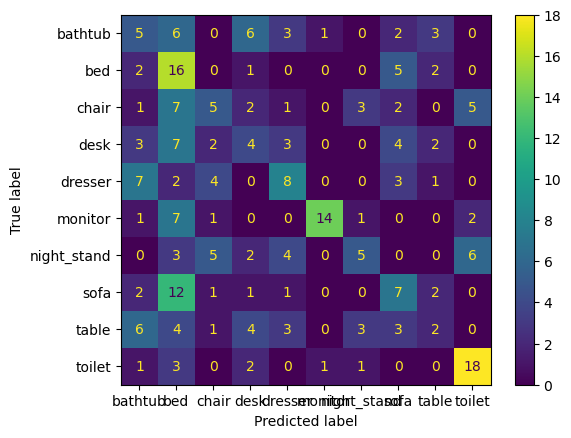

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf , X_test, y_test)

## KNN Classifier

In [132]:
# Train a k-nearest neighbors classifier on the training set with 5 neighbors.

knn_classifier = KNeighborsClassifier(n_neighbors=20)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [133]:
# Predict labels for the testing set.

y_pred_knn = knn_classifier.predict(X_test)

In [134]:
# Compute accuracy of the k-nearest neighbors classifier.

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of k-nearest neighbors classifier: {accuracy_knn:.2f}")

Accuracy of k-nearest neighbors classifier: 0.31


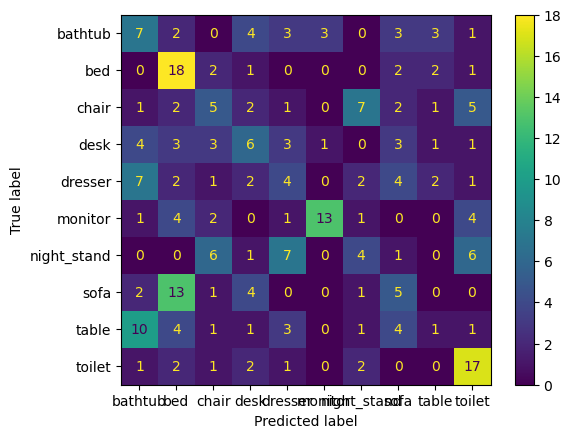

In [135]:
y_pred = knn_classifier.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_classifier, X_test, y_test)

In [126]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
classifier = GradientBoostingClassifier(n_estimators=100,max_depth=10)

classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred = classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of GB classifier: {accuracy:.2f}")

Accuracy of Linear SVM classifier: 0.30


In [137]:
classifier = GradientBoostingClassifier(n_estimators=1000,max_depth=100)

classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred = classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of GB classifier: {accuracy:.2f}")

Accuracy of GB classifier: 0.31


## Linear SVM classifier

In [18]:
svm_classifier = SVC(kernel="linear", C=0.025)

svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_svc = svm_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_svm = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of Linear SVM classifier: {accuracy_svm:.2f}")

Accuracy of Linear SVM classifier: 0.11


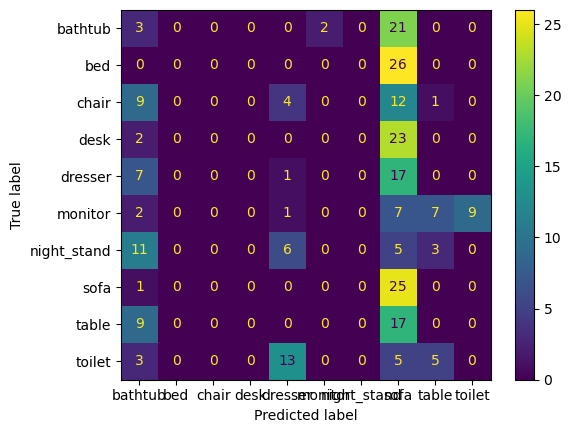

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)

## Radial Basis Function (RBF) SVM

In [20]:
rbf_svm_classifier = SVC(gamma=2, C=1)

rbf_svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_rbf_svc = rbf_svm_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svc)

print(f"Accuracy of RBF SVM classifier: {accuracy_rbf_svm:.2f}")

Accuracy of RBF SVM classifier: 0.10


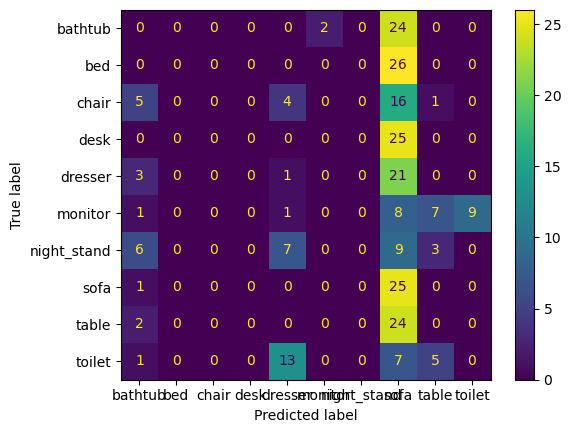

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rbf_svm_classifier, X_test, y_test)

## Gaussian Process classifier

In [22]:
gauss_classifier = GaussianProcessClassifier(1.0 * RBF(1.0))

gauss_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_gauss = gauss_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_gauss = accuracy_score(y_test, y_pred_gauss)

print(f"Accuracy of Gaussian Process classifier: {accuracy_gauss:.2f}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Accuracy of Gaussian Process classifier: 0.19


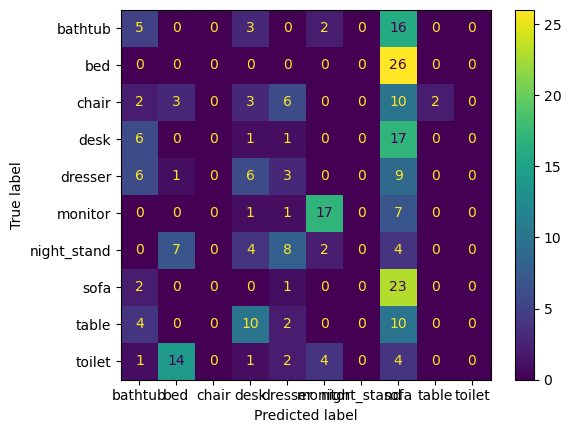

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gauss_classifier, X_test, y_test)

## Decision Tree classifier

In [24]:
dt_classifier = DecisionTreeClassifier(max_depth=5)

dt_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_dt = dt_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.2f}")

Accuracy of Decision Tree classifier: 0.32


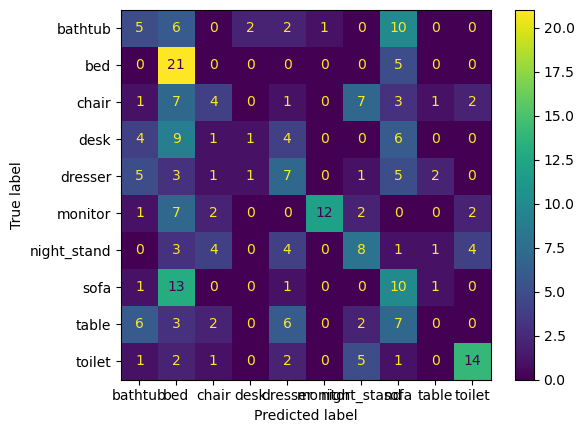

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test)

## Neural Net classifier

In [26]:
nn_classifier = MLPClassifier(alpha=1, max_iter=1000)

nn_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_nn = nn_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"Accuracy of Neural Net classifier: {accuracy_nn:.2f}")

Accuracy of Neural Net classifier: 0.10


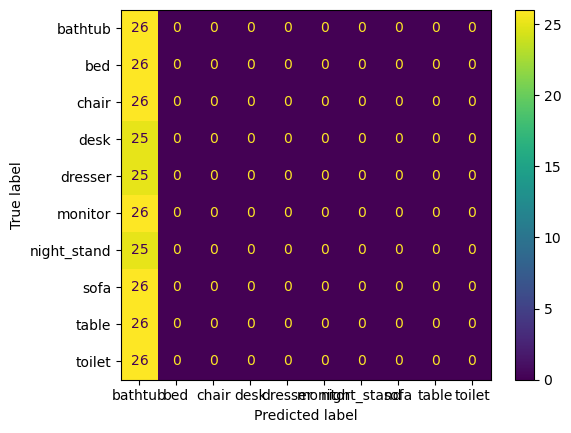

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nn_classifier, X_test, y_test)

## AdaBoost classifier

In [28]:
ada_classifier = AdaBoostClassifier()

ada_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_ada = ada_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"Accuracy of AdaBoost classifier: {accuracy_ada:.2f}")

Accuracy of AdaBoost classifier: 0.21


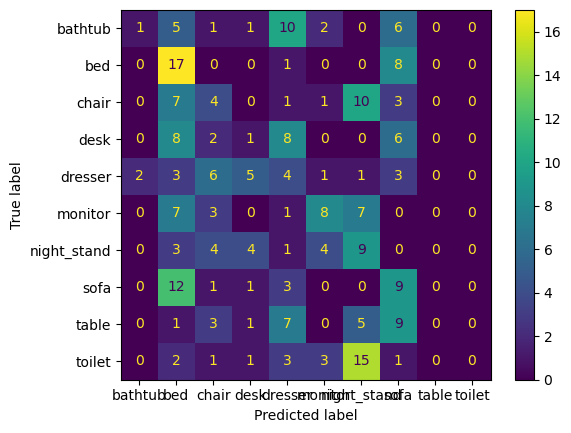

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ada_classifier, X_test, y_test)

## Naive Bayes classifier

In [30]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_nb = nb_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy of Naive Bayes classifier: {accuracy_nb:.2f}")

Accuracy of Naive Bayes classifier: 0.19


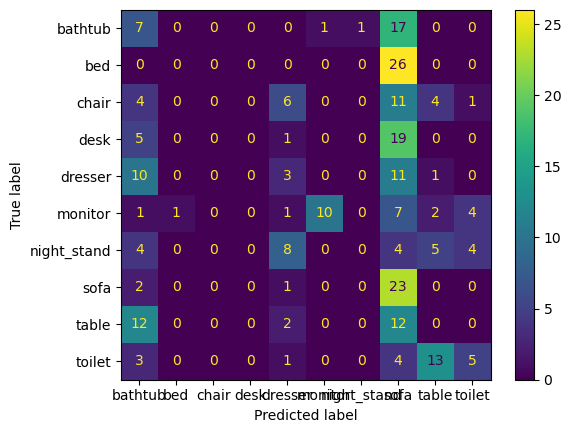

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nb_classifier, X_test, y_test)

## QDA classifier

In [32]:
qda_classifier = QuadraticDiscriminantAnalysis()

qda_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_qda = qda_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_qda = accuracy_score(y_test, y_pred_qda)

print(f"Accuracy of QDA classifier: {accuracy_qda:.2f}")

Accuracy of QDA classifier: 0.21


C:\ProgramData\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


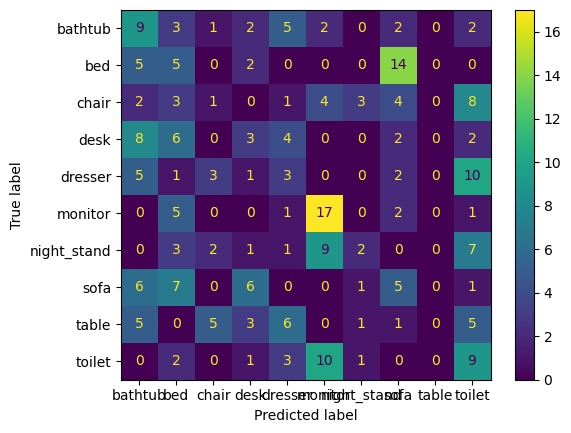

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(qda_classifier, X_test, y_test)

In [138]:
print("###############################################################")
print("##############     Classification Summary   ###################")
print("###############################################################")
print(f"Accuracy of k-nearest neighbors classifier: {accuracy_knn:.2f}")
print(f"Accuracy of Random Forest classifier: {accuracy_random:.2f}")
print(f"Accuracy of Linear SVM classifier: {accuracy_svm:.2f}")
print(f"Accuracy of RBF SVM classifier: {accuracy_rbf_svm:.2f}")
print(f"Accuracy of Gaussian Process classifier: {accuracy_gauss:.2f}")
print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.2f}")
print(f"Accuracy of Neural Net classifier: {accuracy_nn:.2f}")
print(f"Accuracy of AdaBoost classifier: {accuracy_ada:.2f}")
print(f"Accuracy of Naive Bayes classifier: {accuracy_nb:.2f}")
print(f"Accuracy of QDA classifier: {accuracy_qda:.2f}")
print(f"Accuracy of GB classifier: {accuracy:.2f}")

###############################################################
##############     Classification Summary   ###################
###############################################################
Accuracy of k-nearest neighbors classifier: 0.31
Accuracy of Random Forest classifier: 0.33
Accuracy of Linear SVM classifier: 0.11
Accuracy of RBF SVM classifier: 0.10
Accuracy of Gaussian Process classifier: 0.19
Accuracy of Decision Tree classifier: 0.32
Accuracy of Neural Net classifier: 0.10
Accuracy of AdaBoost classifier: 0.21
Accuracy of Naive Bayes classifier: 0.19
Accuracy of QDA classifier: 0.21
Accuracy of GB classifier: 0.31


In [35]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
print(y_train_encoded[:100])
print(y_test_encoded[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [37]:
import torch
X_train_scaled_tensor = torch.from_numpy(X_train).type(torch.float)
X_test_scaled_tensor = torch.from_numpy(X_test).type(torch.float)
y_train_tensor = torch.from_numpy(y_train_encoded).long()
y_test_tensor = torch.from_numpy(y_test_encoded).long()

In [38]:
X_train_scaled_tensor[:5], X_test_scaled_tensor[:5]

(tensor([[ 9.4960e-21,  1.0786e-20,  2.4499e-20,  4.0214e-20,  5.5353e-20,
           8.7072e-20,  2.0286e-19,  2.8737e-19,  6.6267e-19,  7.2647e-07,
           8.5739e-07,  9.0942e-07,  1.9508e-06,  2.3895e-06,  2.4998e-06,
           2.7755e-06,  2.9098e-06,  3.4064e-06,  4.4480e-06,  4.8600e-06,
           4.8614e-06,  5.1452e-06,  5.3604e-06,  5.6142e-06,  5.6403e-06,
           6.1631e-06,  6.8164e-06,  7.0365e-06,  7.9742e-06,  8.4003e-06],
         [ 1.4254e-20,  8.8606e-07,  1.9981e-06,  2.3733e-06,  2.7547e-06,
           3.7141e-06,  3.9524e-06,  4.3829e-06,  4.7473e-06,  5.3032e-06,
           5.6818e-06,  6.4754e-06,  7.0307e-06,  7.4233e-06,  7.8713e-06,
           8.0800e-06,  8.2763e-06,  8.9034e-06,  9.3389e-06,  9.7832e-06,
           1.0990e-05,  1.1210e-05,  1.2223e-05,  1.3424e-05,  1.3925e-05,
           1.4611e-05,  1.5681e-05,  1.7030e-05,  1.8175e-05,  1.9592e-05],
         [-3.2156e-18, -4.5399e-20, -2.4319e-21,  1.7987e-19,  2.3388e-19,
           2.5045e-19, 

In [39]:
y_train_tensor[:100],y_test_tensor[:100]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3]))

In [40]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [67]:
import torch.nn.functional as F
# Creating the Graph Convolutional Network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.fc5 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))
        x = F.relu(self.bn4(self.fc4(x)))
        x = self.fc5(x)

        return x

In [68]:
model = Net()
loss_fn = nn.CrossEntropyLoss()  # (applies Softmax)

In [69]:
print(model)

Net(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
)


In [70]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [71]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [72]:
for epoch in range(1000):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train_scaled_tensor) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train_tensor) 
    acc = accuracy_fn(y_true=y_train_tensor,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
#     model.eval()
#     with torch.inference_mode():
#       # 1. Forward pass
#       test_logits = model(X_test_scaled_tensor)
#       test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
#       # 2. Calculate test loss and accuracy
#       test_loss = loss_fn(test_logits, y_test_tensor)
#       test_acc = accuracy_fn(y_true=y_test_tensor,
#                              y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% ")


Epoch: 0 | Loss: 2.32033, Acc: 10.00% 
Epoch: 100 | Loss: 2.20181, Acc: 16.20% 
Epoch: 200 | Loss: 2.09133, Acc: 22.80% 
Epoch: 300 | Loss: 2.15943, Acc: 15.80% 
Epoch: 400 | Loss: 1.99239, Acc: 25.60% 
Epoch: 500 | Loss: 2.16529, Acc: 18.00% 
Epoch: 600 | Loss: 2.04645, Acc: 21.80% 
Epoch: 700 | Loss: 1.97245, Acc: 25.40% 
Epoch: 800 | Loss: 2.08327, Acc: 17.40% 
Epoch: 900 | Loss: 1.94666, Acc: 27.40% 


In [73]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_logits = model(X_test_scaled_tensor)

# View the first 10 predictions
y_logits[:10]

tensor([[  9.9527,  50.1739, -16.4248,  24.0521, -24.6928,   1.2932, -41.4457,
          46.4002,   0.3171, -42.5763],
        [  9.9274,  50.0456, -16.3825,  23.9914, -24.6298,   1.2890, -41.3431,
          46.2819,   0.3154, -42.4685],
        [  9.9502,  50.1610, -16.4205,  24.0460, -24.6864,   1.2927, -41.4354,
          46.3883,   0.3170, -42.5654],
        [  9.9497,  50.1587, -16.4198,  24.0450, -24.6853,   1.2927, -41.4336,
          46.3862,   0.3169, -42.5636],
        [  9.9550,  50.1854, -16.4285,  24.0576, -24.6984,   1.2935, -41.4549,
          46.4108,   0.3173, -42.5860],
        [  9.9423,  50.1212, -16.4074,  24.0272, -24.6669,   1.2915, -41.4035,
          46.3516,   0.3164, -42.5320],
        [  9.9508,  50.1642, -16.4216,  24.0476, -24.6880,   1.2929, -41.4380,
          46.3913,   0.3170, -42.5682],
        [  9.9499,  50.1596, -16.4201,  24.0454, -24.6858,   1.2927, -41.4343,
          46.3870,   0.3169, -42.5643],
        [  9.9508,  50.1640, -16.4215,  24.0475,

In [74]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test_tensor[:10]}")
# print(f"Test accuracy: {accuracy_fn(y_true=y_test_tensor, y_pred=y_preds)}%")

Predictions: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [75]:
def confusion_matrix(y_true, y_pred):
    K = len(set(y_true)) # Number of classes 
    result = torch.zeros((K,K))
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

In [76]:
confusion_matrix(y_test_tensor, y_preds)

tensor([[ 0., 25.,  0.,  ...,  0.,  0.,  0.],
        [ 0., 26.,  0.,  ...,  0.,  0.,  0.],
        [ 0., 26.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])

In [114]:
# Hyperparameters
input_size = 30
sequence_length = 30
num_layers = 2
hidden_size = 256
num_classes = 10
learning_rate = 3e-4
batch_size = 64
num_epochs = 100

In [115]:
# Create a bidirectional LSTM
class BRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers, batch_first=True, bidirectional=True
        )
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x)
        out = self.fc(out)

        return out

In [116]:
# Initialize network
model = BRNN(input_size, hidden_size, num_layers, num_classes).to(device)
print(model)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

BRNN(
  (lstm): LSTM(30, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=10, bias=True)
)


In [145]:
for epoch in range(151):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train_scaled_tensor) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train_tensor) 
    acc = accuracy_fn(y_true=y_train_tensor,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test_scaled_tensor)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test_tensor)
      test_acc = accuracy_fn(y_true=y_test_tensor,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}%| Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.75885, Acc: 78.00%| Test Loss: 4.06518, Test Acc: 29.18%
Epoch: 10 | Loss: 0.55811, Acc: 92.20%| Test Loss: 4.31720, Test Acc: 20.23%
Epoch: 20 | Loss: 0.92470, Acc: 65.40%| Test Loss: 4.51013, Test Acc: 20.23%
Epoch: 30 | Loss: 0.88800, Acc: 64.60%| Test Loss: 4.42118, Test Acc: 30.35%
Epoch: 40 | Loss: 0.76720, Acc: 74.80%| Test Loss: 4.40761, Test Acc: 22.96%
Epoch: 50 | Loss: 0.48694, Acc: 91.40%| Test Loss: 4.49163, Test Acc: 20.62%
Epoch: 60 | Loss: 0.40833, Acc: 94.60%| Test Loss: 4.66405, Test Acc: 21.01%
Epoch: 70 | Loss: 0.35471, Acc: 93.40%| Test Loss: 4.89745, Test Acc: 19.46%
Epoch: 80 | Loss: 0.28954, Acc: 97.20%| Test Loss: 5.05231, Test Acc: 20.23%
Epoch: 90 | Loss: 0.41959, Acc: 85.80%| Test Loss: 5.12245, Test Acc: 22.18%
Epoch: 100 | Loss: 0.30513, Acc: 92.20%| Test Loss: 5.22211, Test Acc: 20.23%
Epoch: 110 | Loss: 0.24943, Acc: 95.60%| Test Loss: 5.30853, Test Acc: 20.23%
Epoch: 120 | Loss: 0.21206, Acc: 96.40%| Test Loss: 5.43075, Test Acc: 20.6

In [140]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_logits = model(X_test_scaled_tensor)

# View the first 10 predictions
y_logits[:10]

tensor([[ 4.3856e+00,  3.2709e+00,  2.7867e+00,  8.3640e-01, -1.7419e+00,
         -2.5903e+00, -2.4546e+00,  2.5605e+00,  3.2392e+00, -1.0047e+00],
        [ 4.5601e+00,  3.3944e+00,  2.9113e+00,  1.0074e+00, -1.6120e+00,
         -2.6028e+00, -2.6731e+00,  2.4778e+00,  3.3639e+00, -8.1904e-01],
        [ 4.7176e+00,  3.5157e+00,  3.0344e+00,  1.1771e+00, -1.4858e+00,
         -2.6016e+00, -2.8804e+00,  2.3670e+00,  3.4802e+00, -6.3623e-01],
        [ 4.8509e+00,  3.6285e+00,  3.1482e+00,  1.3350e+00, -1.3723e+00,
         -2.5974e+00, -3.0657e+00,  2.2510e+00,  3.5834e+00, -4.6772e-01],
        [ 4.9559e+00,  3.7280e+00,  3.2479e+00,  1.4739e+00, -1.2763e+00,
         -2.5957e+00, -3.2229e+00,  2.1447e+00,  3.6710e+00, -3.2015e-01],
        [ 5.0337e+00,  3.8125e+00,  3.3326e+00,  1.5920e+00, -1.1982e+00,
         -2.5980e+00, -3.3518e+00,  2.0544e+00,  3.7431e+00, -1.9484e-01],
        [ 5.0888e+00,  3.8835e+00,  3.4041e+00,  1.6912e+00, -1.1354e+00,
         -2.6037e+00, -3.4563e+0

In [141]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test_tensor[:10]}")
# print(f"Test accuracy: {accuracy_fn(y_true=y_test_tensor, y_pred=y_preds)}%")

Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [142]:
def confusion_matrix(y_true, y_pred):
    K = len(set(y_true)) # Number of classes 
    result = torch.zeros((K,K))
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

In [143]:
test_acc = accuracy_fn(y_true=y_test_tensor,y_pred=y_preds)

In [144]:
print("Test Accuracy:",test_acc)

Test Accuracy: 29.961089494163424


In [121]:
confusion_matrix(y_test_tensor, y_preds)

tensor([[26.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 1., 25.,  0.,  ...,  0.,  0.,  0.],
        [ 0., 26.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])

In [122]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_logits = model(X_train_scaled_tensor)

# View the first 10 predictions
y_logits[:10]

tensor([[ 4.3859e+00,  3.2711e+00,  2.7868e+00,  8.3668e-01, -1.7416e+00,
         -2.5903e+00, -2.4550e+00,  2.5604e+00,  3.2394e+00, -1.0046e+00],
        [ 4.5606e+00,  3.3948e+00,  2.9116e+00,  1.0079e+00, -1.6115e+00,
         -2.6029e+00, -2.6738e+00,  2.4775e+00,  3.3643e+00, -8.1876e-01],
        [ 4.7184e+00,  3.5161e+00,  3.0348e+00,  1.1778e+00, -1.4852e+00,
         -2.6017e+00, -2.8812e+00,  2.3666e+00,  3.4807e+00, -6.3582e-01],
        [ 4.8518e+00,  3.6290e+00,  3.1486e+00,  1.3357e+00, -1.3716e+00,
         -2.5975e+00, -3.0666e+00,  2.2505e+00,  3.5840e+00, -4.6726e-01],
        [ 4.9568e+00,  3.7284e+00,  3.2483e+00,  1.4747e+00, -1.2756e+00,
         -2.5959e+00, -3.2238e+00,  2.1442e+00,  3.6716e+00, -3.1972e-01],
        [ 5.0346e+00,  3.8129e+00,  3.3329e+00,  1.5927e+00, -1.1975e+00,
         -2.5983e+00, -3.3527e+00,  2.0539e+00,  3.7436e+00, -1.9450e-01],
        [ 5.0897e+00,  3.8839e+00,  3.4043e+00,  1.6918e+00, -1.1348e+00,
         -2.6041e+00, -3.4571e+0

In [123]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test_tensor[:10]}")
# print(f"Test accuracy: {accuracy_fn(y_true=y_test_tensor, y_pred=y_preds)}%")

Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [124]:
def confusion_matrix(y_true, y_pred):
    K = len(set(y_true)) # Number of classes 
    result = torch.zeros((K,K))
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

In [125]:
confusion_matrix(y_test_tensor, y_preds)

tensor([[26.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 1., 25.,  0.,  ...,  0.,  0.,  0.],
        [ 0., 26.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])